#**Maestría en Inteligencia Artificial Aplicada**

##**TC5044.10 Operaciones de aprendizaje automático**

###Tecnológico de Monterrey

###Dr. Gerardo Rodríguez Hernández

## **Fase 1_Equipo23**

## **Equipo # 23**

## **Nombre y matrícula:**

* Hansel Zapiain Rodriguez A00469031
* Víctor Daniel Bohórquez Toribio A01794554
* Ruben Guerrero del Fierro A01793005
* Omar Mexia Barraza A01794780
* Luis Axel González Hernández A01795321

# **Parte I: EDA y preprocesamiento de datos**

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import boxcox

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
# Si queremos asegurar que en la partición los niveles de las categóricas queden estratificados lo mejor posible:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [65]:
# Cambiamos el directorio
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/MLops"
os.chdir(DIR)

# Cargamos los datos con el separador correcto
df = pd.read_csv("data.csv", sep=';')

# Imprimimos la forma del DataFrame y las primeras filas
print(df.shape)
print(df.head(5))

(4424, 37)
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                          

In [66]:
# Tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [67]:
# Análisis de Distribución
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

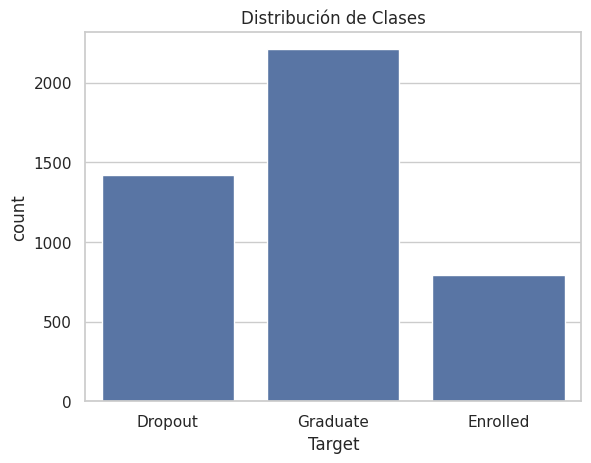

In [68]:
# Distribucion de clases
sns.countplot(x='Target', data=df)  #columna de clases
plt.title('Distribución de Clases')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

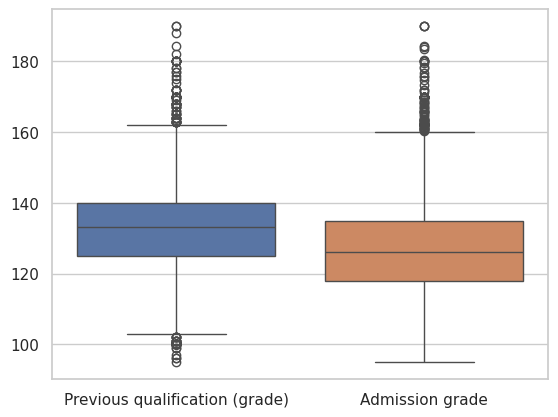

In [69]:
# Identificación de Outliers
sns.boxplot(data=df[['Previous qualification (grade)', 'Admission grade']])
plt.show()

In [62]:
# Codificación de Variables Categóricas
#df = pd.get_dummies(df, columns=['Nacionality', 'Target'], drop_first=True)

In [63]:
# Normalización/Estandarización
#scaler = StandardScaler()
#df[['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']] = scaler.fit_transform(df[['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']])

In [85]:
# División del Conjunto de Datos
X = df.drop('Target', axis=1)  # Características
y = df['Target']  # Etiquetas

# Primera división en entrenamiento y prueba (70% entrenamiento, 30% prueba)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Segunda división en validación y prueba (50% validación, 50% prueba)
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=42)


# Mostremos las dimensiones de la partición generada:
print("Dimensiones de los conjuntos:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Validacion:", Xval.shape, yval.shape)
print("Prueba:", Xtest.shape, ytest.shape)

Dimensiones de los conjuntos:
Entrenamiento: (3096, 36) (3096,)
Validacion: (664, 36) (664,)
Prueba: (664, 36) (664,)


In [71]:
# División del Conjunto de Datos
#X = df.drop('Target', axis=1)  # Características
#y = df['Target']  # Etiquetas

# División en entrenamiento (80%) y prueba (20%)
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostremos las dimensiones de la partición generada:
#print("Dimensiones de los conjuntos:")
#print("Entrenamiento:", Xtrain.shape, ytrain.shape)
#print("Prueba:", Xtest.shape, ytest.shape)

In [56]:
# Manejo del Desequilibrio de Clases
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(Xtrain, ytrain)

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

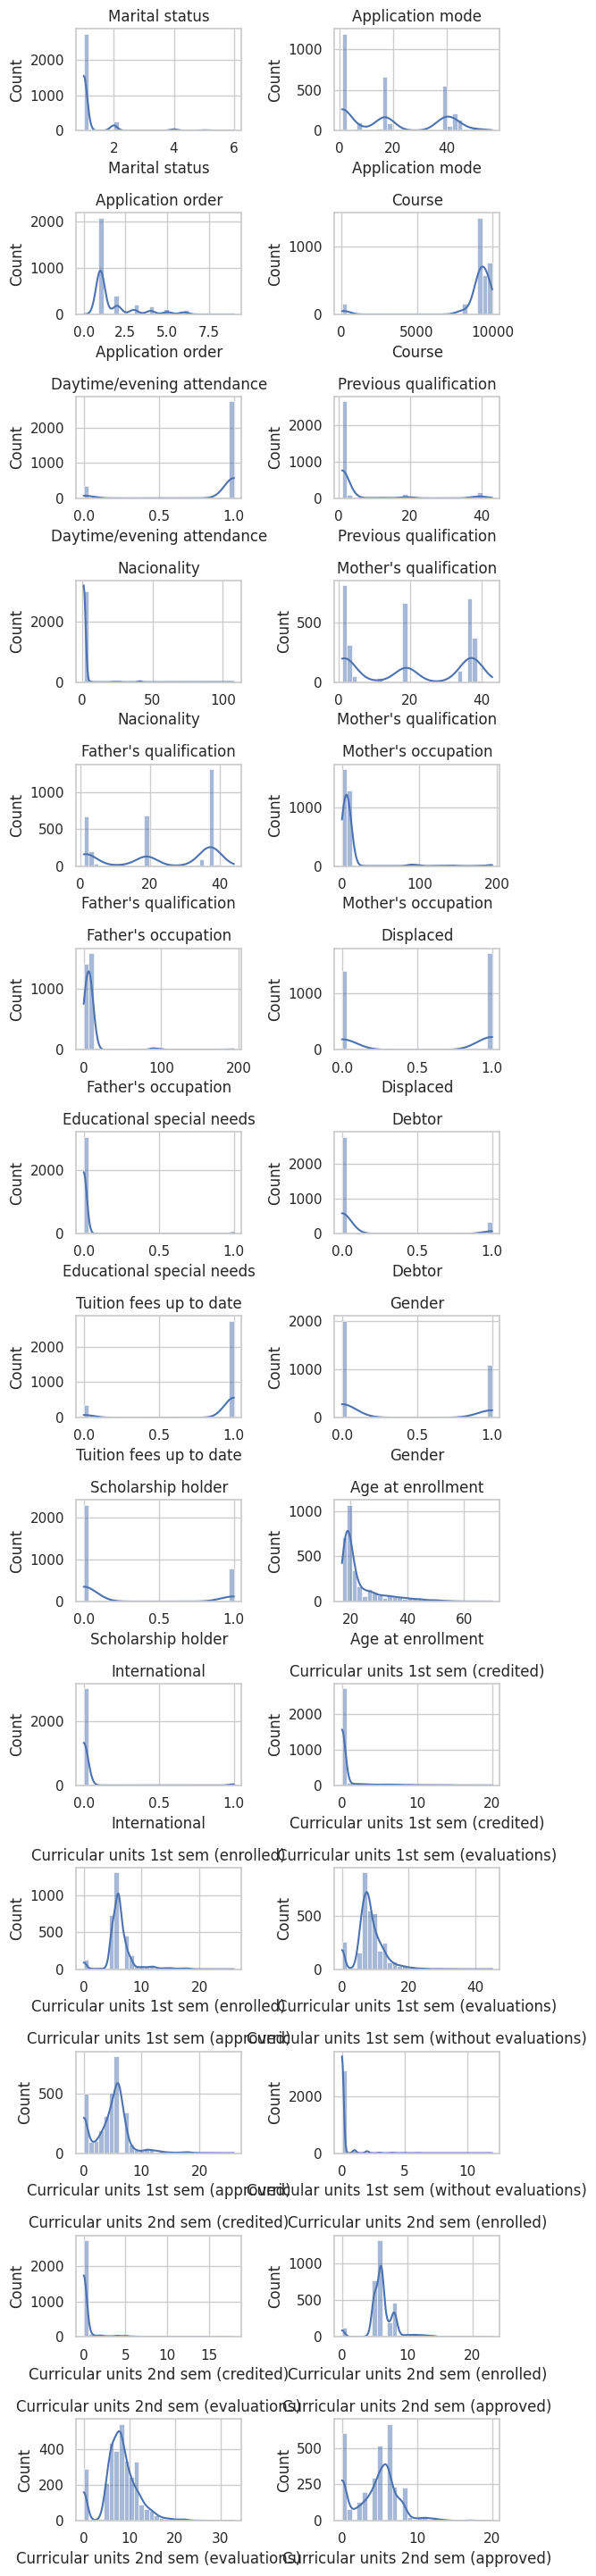

In [72]:
# Usando solamente el conjunto de Entrenamiento.

# Se seleccionan solo las columnas numéricas del conjunto de entrenamiento
numeric_columns = Xtrain.select_dtypes(include=['int64']).columns

# Muestra histogramas para las variables numéricas
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(numeric_columns)//2, ncols=2, figsize=(6, 2*len(numeric_columns)//2))

for col, ax in zip(numeric_columns, axes.flatten()):
    sns.histplot(data=Xtrain, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col)

plt.tight_layout()
plt.show()



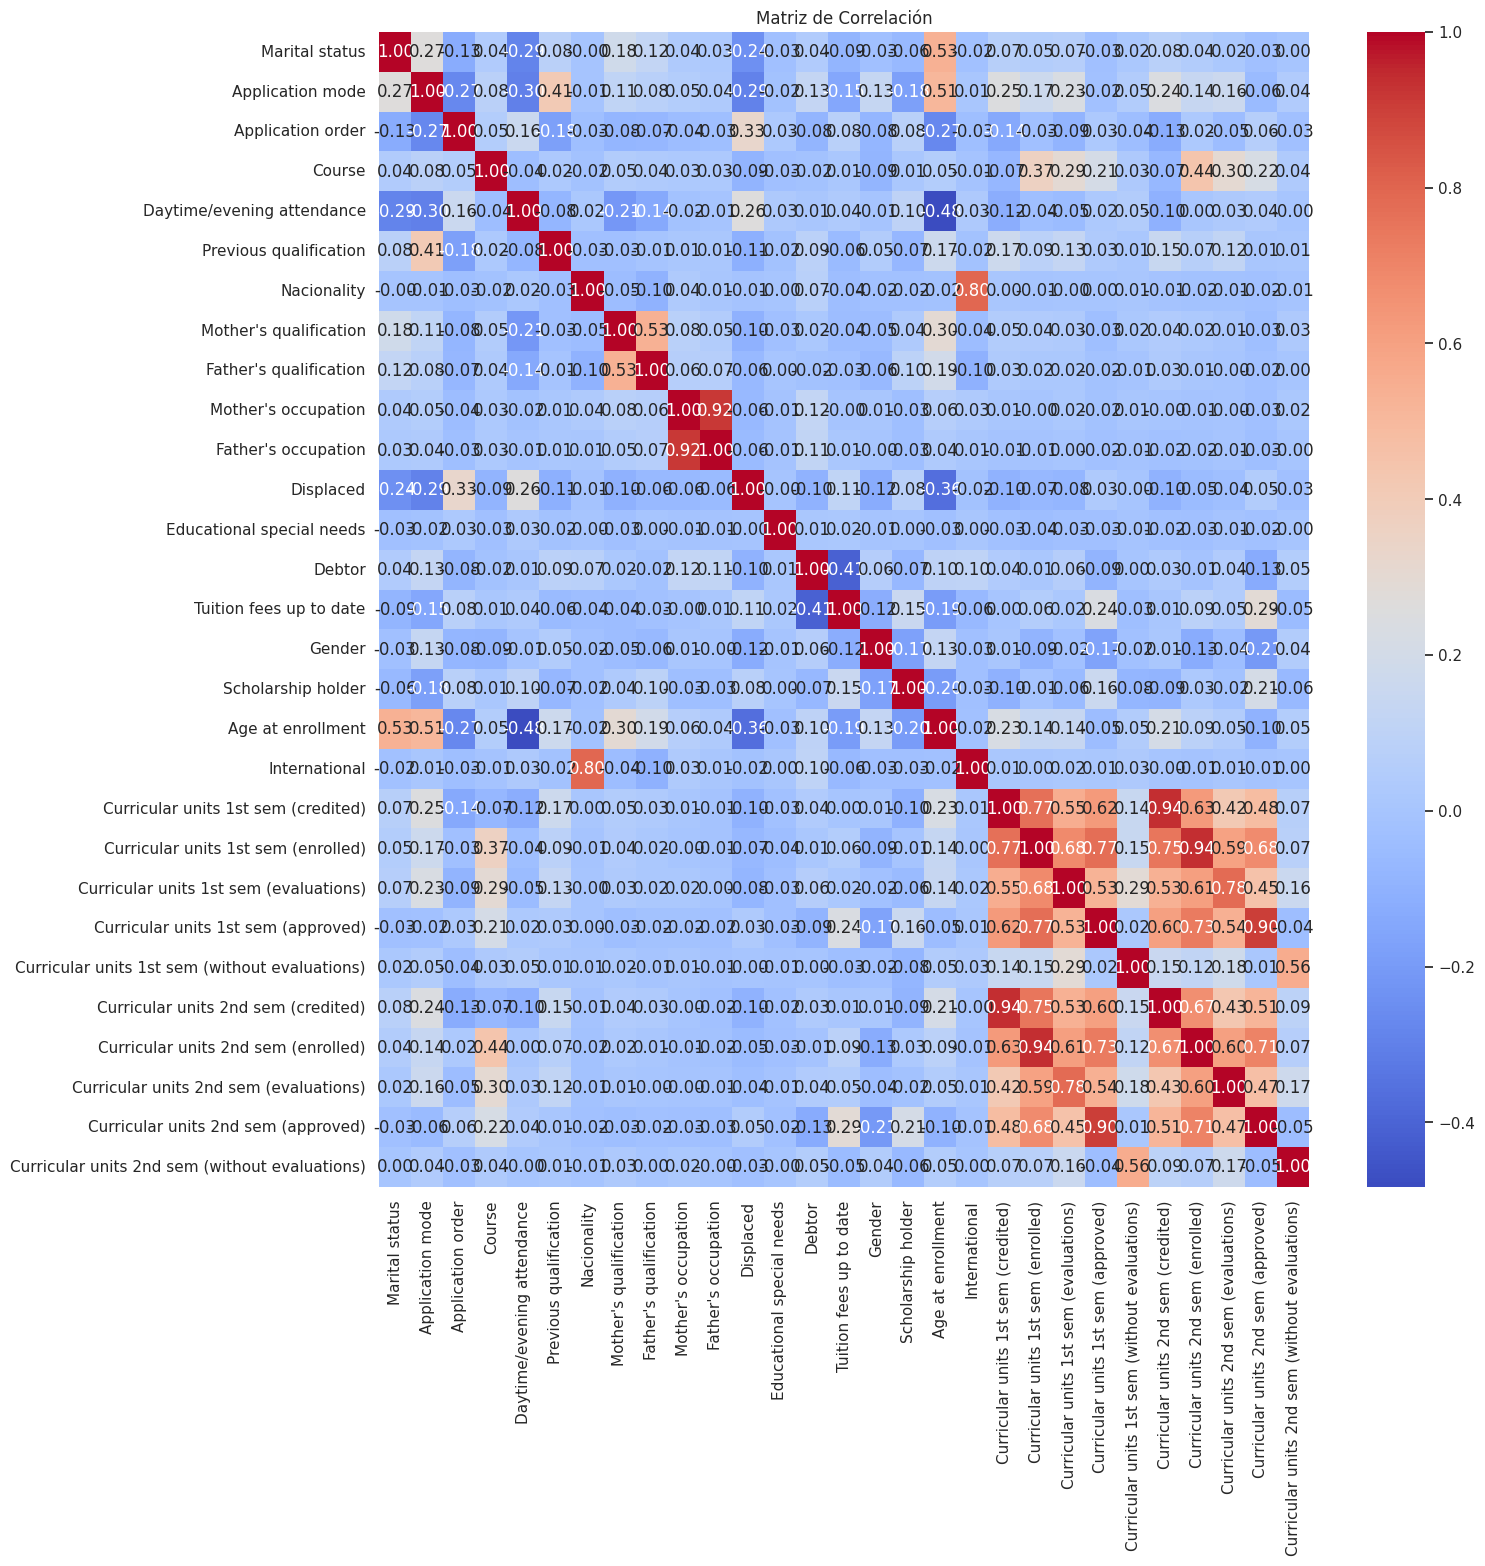

In [74]:
# Calcula la matriz de correlación
correlation_matrix = Xtrain[numeric_columns].corr()

# Crea un mapa de calor utilizando Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

In [81]:
# Definir las listas de variables según el DataFrame proporcionado
num_lista = ['Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP']

# Variables numéricas

cat_lista = ['Marital status', 'Application mode', 'Application order',
    'Course', 'Daytime/evening attendance', 'Previous qualification',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
    'Mother\'s occupation', 'Father\'s occupation', 'Displaced',
    'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']
# Variables categóricas nominales

cat_ord_lista = []  # Puedes añadir aquí las variables categóricas ordinales si las tienes

# Pipeline para variables numéricas
num_pipe = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('minmax_scaler', MinMaxScaler())
])

# Pipeline para variables categóricas
cat_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combinación de transformaciones
columnasTransformer = ColumnTransformer(transformers=[
    ('num_transf', num_pipe, num_lista),
    ('cat_transf', cat_pipe, cat_lista),
    ('catord_transf', OrdinalEncoder(), cat_ord_lista)  # Si hay variables ordinales
], remainder='passthrough')

In [82]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval],axis=0)
ytrainval = np.concatenate((ytrain, yval))

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(3760, 36) (3760,)


In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.

  # Regresión Logística:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=2000,    # 10, 100, 1000
                                    C = 0.1,     # 0.000001, 0.005, 0.01,  1000
                                    #random_state=1
                                    ))
  nombres.append('LR')

  # k-Vecinos Más Cercanos:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier(n_neighbors = 5,     # 1, 5, 21, 201
                                      ))
  nombres.append('kNN')

  # Árbol de Decisión:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier(max_depth = None,       # None, 5, 3, 1
                                        min_samples_split=2,   # 2,3,5, 20
                                        #min_samples_leaf=1,  # trata al inicio de usar solo uno de estos, split o leaf, para su mejor comprensión.
                                        #random_state=7
                                        ))
  nombres.append('DTree')

  # Bosque Aleatorio:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
                                        max_depth= 3,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                        min_samples_split=2,    # 2, 5, 15
                                        random_state=42
                                        ))
  nombres.append('RF')

  # XGBoost:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=100,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 6,             # 1,3, 6,
                               learning_rate=0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=1.0,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               #random_state=5,
                               objective='binary:logistic',
                               n_jobs=-1))
  nombres.append('XGBoost')

  # Red Neuronal Artificial: Perceptrón MultiCapa:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=2000,                  # 200,
                               alpha=0.0001,               # término de regularización L2.
                               #learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                               #learning_rate_init=0.001,
                               #random_state=1
                               ))
  nombres.append('MLP')

  # Máquina de Vector Soporte : Support Vector Machine
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel='rbf',
                     C= 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state=7
                     ))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres


# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_recall 0.315 (0.053)
	 train_recall 0.368 (0.030)
	 test_accuracy 0.734 (0.026)
	 train_accuracy 0.767 (0.006)
	 test_precision 0.615 (0.092)
	 train_precision 0.722 (0.012)
	 test_f1 0.415 (0.063)
	 train_f1 0.486 (0.027)
	 test_roc_auc 0.764 (0.043)
	 train_roc_auc 0.814 (0.008)
>> kNN
	 test_recall 0.340 (0.044)
	 train_recall 0.522 (0.030)
	 test_accuracy 0.687 (0.027)
	 train_accuracy 0.787 (0.009)
	 test_precision 0.479 (0.057)
	 train_precision 0.696 (0.017)
	 test_f1 0.395 (0.037)
	 train_f1 0.596 (0.022)
	 test_roc_auc 0.639 (0.027)
	 train_roc_auc 0.832 (0.010)
>> DTree
	 test_recall 0.513 (0.082)
	 train_recall 1.000 (0.000)
	 test_accuracy 0.684 (0.037)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.478 (0.055)
	 train_precision 1.000 (0.000)
	 test_f1 0.493 (0.061)
	 train_f1 1.000 (0.000)
	 test_roc_auc 0.635 (0.044)
	 train_roc_auc 1.000 (0.000)
>> RF
	 test_recall 0.040 (0.018)
	 train_recall 0.076 (0.021)
	 test_accuracy 0.706 (0.009)
	 train_accuracy 0

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

El error más costoso para el banco es clasificar erróneamente a un cliente como "Bueno" (Good) cuando en realidad es "Malo" (Bad), lo que corresponde a un falso positivo. Esto se demuestra por el valor de 5 en la celda correspondiente a la fila 2 (cliente malo) y la columna 1 (clasificación como cliente bueno).

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

Dado que el error más costoso es el falso positivo, es importante considerar métricas que minimicen este tipo de error. Las métricas importantes a considerar son:

* Recall: Indica la proporción de verdaderos positivos sobre el total de casos positivos reales. Es útil cuando el costo de un falso negativo es alto, ya que minimiza este tipo de error.

* Precisión (Precision): Esta métrica indica la proporción de verdaderos positivos sobre el total de predicciones positivas. Una alta precisión implica que la mayoría de las predicciones positivas son verdaderas y minimiza los falsos positivos.

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

* F1 Score: El valor F1 combina la precisión y el recall en una sola métrica, lo que lo hace útil cuando hay un desequilibrio entre las clases. Es una medida del equilibrio entre la precisión y el recall, y puede ser útil cuando se quiere minimizar tanto los falsos positivos como los falsos negativos.

* Sensibilidad (Sensitivity): Similar a la exhaustividad, mide la proporción de verdaderos positivos sobre el total de casos positivos reales. Es útil cuando se quiere minimizar los falsos negativos.

* Especificidad (Specificity): Indica la proporción de verdaderos negativos sobre el total de casos negativos reales. Es útil cuando se quiere minimizar los falsos positivos.


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

# Recolectar los resultados de recall para cada modelo
recall_scores = {nombre: [] for nombre in nombres}
for resultado in resultados:
    for nombre, score in zip(nombres, resultado['test_recall']):
        recall_scores[nombre].append(score)

# Crear el DataFrame de los resultados
data = []
for nombre, scores in recall_scores.items():
    for score in scores:
        data.append({'Modelo': nombre, 'Recall': score})
df_resultados = pd.DataFrame(data)

# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Recall', data=df_resultados)
plt.title('Diagrama de Caja y Bigotes de Recall para Modelos')
plt.ylabel('Recall')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

# *********** Aquí termina la sección de agregar código *************


# Incluye tus conclusiones al respecto, en particular indica cuáles consideras son los tres mejores modelos obtenidos.


* Regresión Logística (LR):

El rendimiento de LR es moderado. Tiene una precisión y un F1-score relativamente bajos, tanto en el conjunto de prueba como en el de entrenamiento.

* Random Forest (RF):

Aunque RF tiene una alta precisión en el conjunto de prueba, su recall y F1-score son muy bajos.
El rendimiento en el conjunto de entrenamiento es mejor, el recall y el F1-score son bastante bajos.

* XGBoost:

Tiene el recall más alto en el conjunto de prueba, lo que indica que puede identificar más positivos verdaderos.
También tiene una precisión y un F1-score relativamente altos.
El área bajo la curva ROC (ROC AUC) es bastante alto tanto en el conjunto de prueba como en el de entrenamiento, lo que indica una buena capacidad para clasificar correctamente las muestras.

# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************
# Instanciar el objeto SMOTE
smote = SMOTE()

# Aplicar SMOTE al conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(Xtrainval, ytrainval)

# Definir los valores de los hiperparámetros
hiperparametros = {
    'solver': 'liblinear'  # Seleccionar el solver adecuado para conjuntos de datos pequeños
}


def mis_modelos():
  modelos, nombres = list(), list()


  # Regresión Logística:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=2000,    # 10, 100, 1000
                                    C = 0.1,     # 0.000001, 0.005, 0.01,  1000
                                    #random_state=1
                                    ))
  nombres.append('LR')


  # Bosque Aleatorio:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
                                        max_depth= 3,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                        min_samples_split=2,    # 2, 5, 15
                                        random_state=42
                                        ))
  nombres.append('RF')

  # XGBoost:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=100,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 6,             # 1,3, 6,
                               learning_rate=0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=1.0,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               #random_state=5,
                               objective='binary:logistic',
                               n_jobs=-1))
  nombres.append('XGBoost')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres


# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))
# *********** Aquí termina la sección de agregar código *************

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++
MODELO LR

El desempeño integral de LR y su énfasis en el recall la convierten en la opción preferida, proporcionando un sólido compromiso entre maximizar las detecciones positivas y mantener niveles razonables de precisión y exactitud.

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [ ]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************
# Definir el modelo
lr_model = LogisticRegression(max_iter=3000, C=1, random_state=1)

# Definir el diccionario de parámetros para la búsqueda de cuadrícula
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularización inversa
    'penalty': ['l2']  # Tipo de regularización (l1 = Lasso, l2 = Ridge)
}

# Realizar la búsqueda de cuadrícula combinada con la validación cruzada
micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(estimator=lr_model,
                           param_grid=param_grid,
                           cv=micv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Realizar la búsqueda de cuadrícula
grid_search.fit(Xtrainval, ytrainval)

# Obtener los mejores hiperparámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Mostrar los mejores hiperparámetros y el mejor resultado
print("Mejores hiperparámetros encontrados:")
print(best_params)
print("Mejor resultado (accuracy):", best_score)

# Utilizar los mejores hiperparámetros para realizar la validación cruzada
lr_model_best = LogisticRegression(**best_params, max_iter=1000, random_state=1)
scores = cross_validate(lr_model_best, Xtrainval, ytrainval,
                        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv=micv, return_train_score=True)

# Mostrar los resultados de la validación cruzada
for metric in scores.keys():
    if metric.startswith('train'):
        print("Train", metric[6:], "mean:", np.mean(scores[metric]))
        print("Train", metric[6:], "std:", np.std(scores[metric]))
    else:
        print("Test", metric, "mean:", np.mean(scores[metric]))
        print("Test", metric, "std:", np.std(scores[metric]))

# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 14**

In [ ]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

Xtestval = pd.concat([Xtest, Xval],axis=0)
ytestval = np.concatenate((ytest, yval))

def mis_modelos_test():
  modelos, nombres = list(), list()

  # Regresión Logística:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=1000,    # 10, 100, 1000
                                    C = 0.1,     # 0.000001, 0.005, 0.01,  1000
                                    random_state=1
                                    ))
  nombres.append('LR')



  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres



# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos_test()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtestval,
                          ytestval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

# *********** Aquí termina la sección de agregar código *************


In [ ]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************

for i in range(len(modelos)):
    # Ajustar el modelo con el conjunto de prueba
    modelos[i].fit(Xtest, ytest)

    # Calcular las predicciones
    y_pred = modelos[i].predict(Xtest)

    # Calcular la matriz de confusión
    print(f">> {nombres[i]}:")
    matriz_confusion = confusion_matrix(ytest, y_pred)
    print("Matriz de Confusión:")
    print(matriz_confusion)

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Ajustar el modelo con el conjunto de prueba
modelos[i].fit(Xtest, ytest)

# Calcular las predicciones
y_pred = modelos[i].predict(Xtest)

# Mostrar la matriz de confusión
plot_confusion_matrix(ytest, y_pred, classes=np.unique(ytest), title=f'Matriz de Confusión - {nombres[i]}')
plt.show()

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(ytest, y_pred))

# Si el modelo lo permite, mostrar la importancia de las variables
if hasattr(modelos[i], 'feature_importances_'):
    importancias = modelos[i].feature_importances_
    print("Importancia de Variables:")
    for nombre, importancia in zip(X.columns, importancias):
        print(f"{nombre}: {importancia}")

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Resultados de la IEEE:

Los resultados indicaron que el modelo GBDT tuvo una tasa de precisión de predicción más alta en comparación con los modelos tradicionales de aprendizaje automático. Específicamente, el método GBDT con el método de remuestreo K-means SMOTE logró una precisión del 88.7% en el conjunto de datos de clientes de Taiwán, superando significativamente a otros conjuntos de datos utilizados en el estudio.

Resultados del mejor modelo LR:

El modelo de Regresión Logística (LR) es la mejor opción debido a su capacidad robusta para minimizar falsos negativos, lo que resulta crucial en aplicaciones donde identificar correctamente instancias positivas es de suma importancia.
LR mantiene un balance favorable entre precisión, recall, interpretabilidad y simplicidad, superando a modelos más complejos como Random Forest y XGBoost.
Aunque Random Forest y XGBoost ofrecen ligeramente mayor precisión y exactitud, su compensación con el recall puede no ser adecuada para escenarios donde los falsos positivos tienen consecuencias significativas o donde se busca un desempeño equilibrado entre precisión y recall.

### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**